In [4]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

# Load RIRs

In [5]:
path_to_rirs_hdf = Path('../outputs/dEchorate_rirs.hdf5')
rir_dset = h5py.File(path_to_rirs_hdf, mode='r')

signals = list(rir_dset.keys())
print('Signals', signals)

rooms = list(rir_dset[signals[0]].keys())
print('Rooms', rooms)

sources = list(rir_dset[signals[0]][rooms[0]].keys())
print('Sources', sources)

print(rir_dset[signals[0]][rooms[0]][sources[0]].shape)

Signals ['rir']
Rooms ['000000', '000001', '000010', '000100', '001000', '010000', '011000', '011100', '011110', '011111', '020002']
Sources ['0', '1', '2', '3', '4', '5', '6', '7', '8']
(24000, 31)


/rir/000000/0
/rir/000000/1
/rir/000000/2
/rir/000000/3
/rir/000000/4
/rir/000000/5
/rir/000000/6
/rir/000000/7
/rir/000000/8


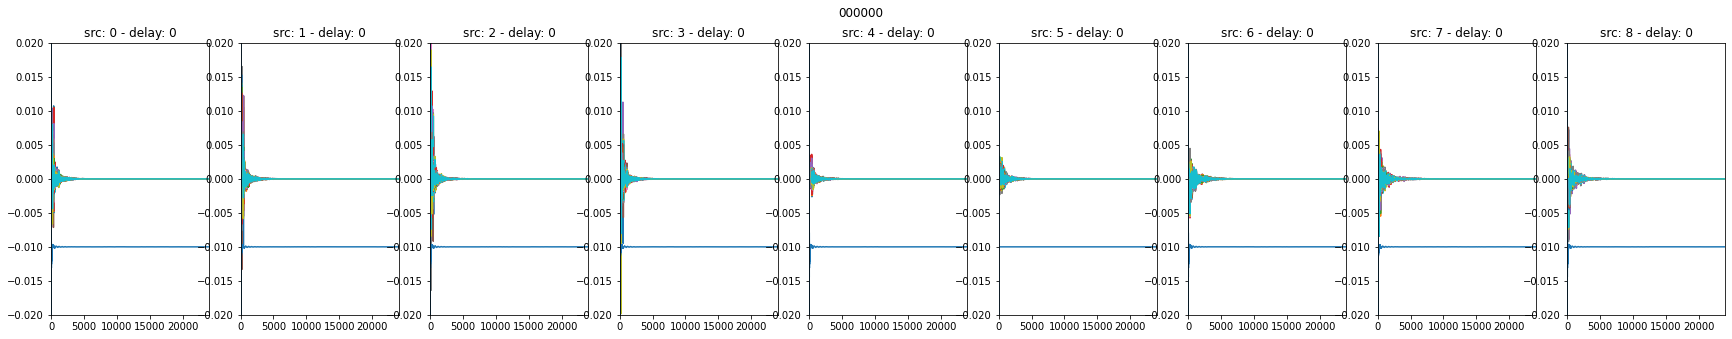

/rir/000001/0
/rir/000001/1
/rir/000001/2
/rir/000001/3
/rir/000001/4
/rir/000001/5
/rir/000001/6
/rir/000001/7
/rir/000001/8


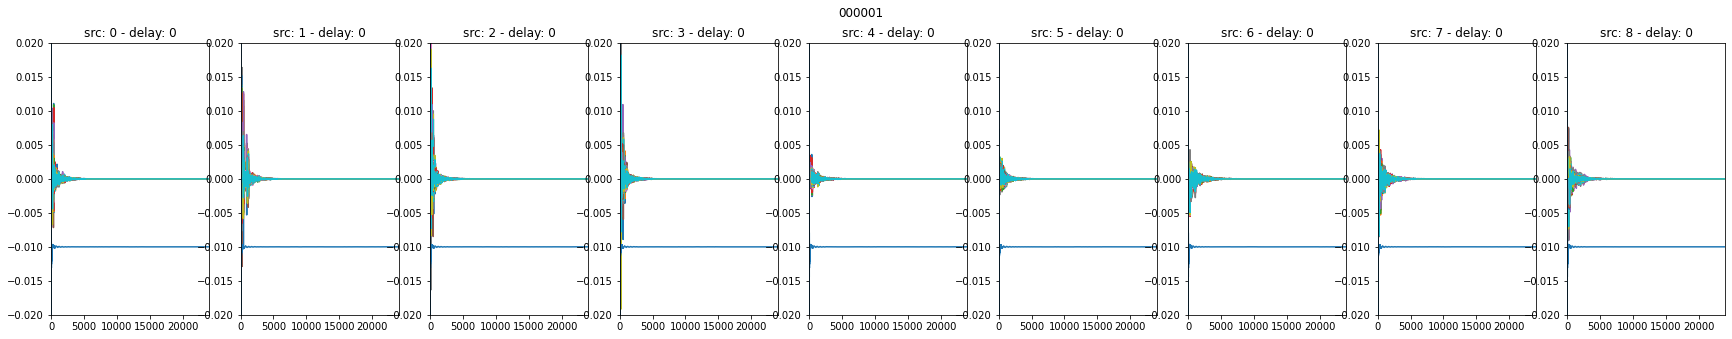

/rir/000010/0
/rir/000010/1
/rir/000010/2
/rir/000010/3
/rir/000010/4
/rir/000010/5
/rir/000010/6
/rir/000010/7
/rir/000010/8


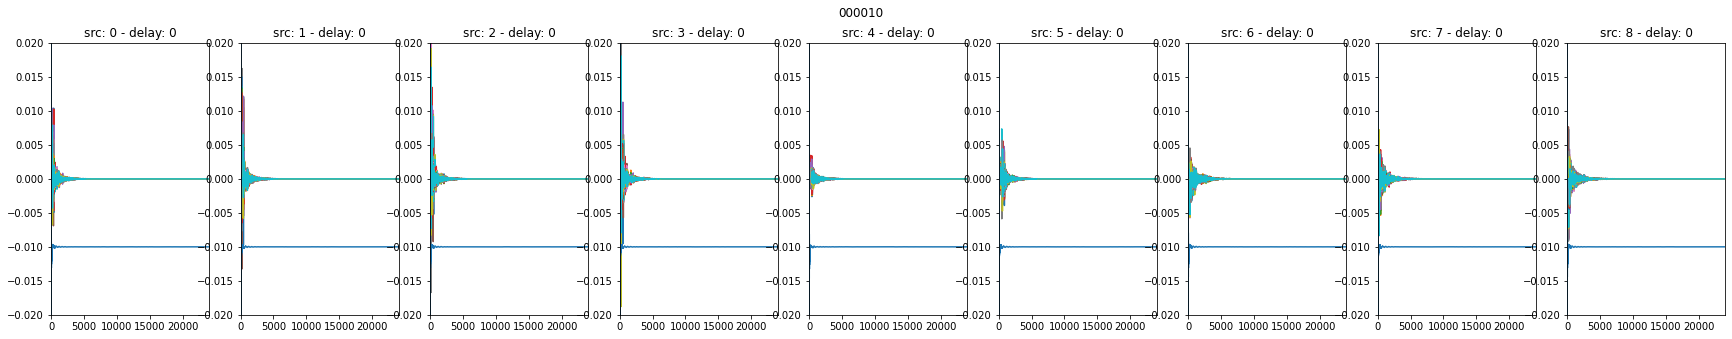

/rir/000100/0
/rir/000100/1
/rir/000100/2
/rir/000100/3
/rir/000100/4
/rir/000100/5
/rir/000100/6
/rir/000100/7
/rir/000100/8


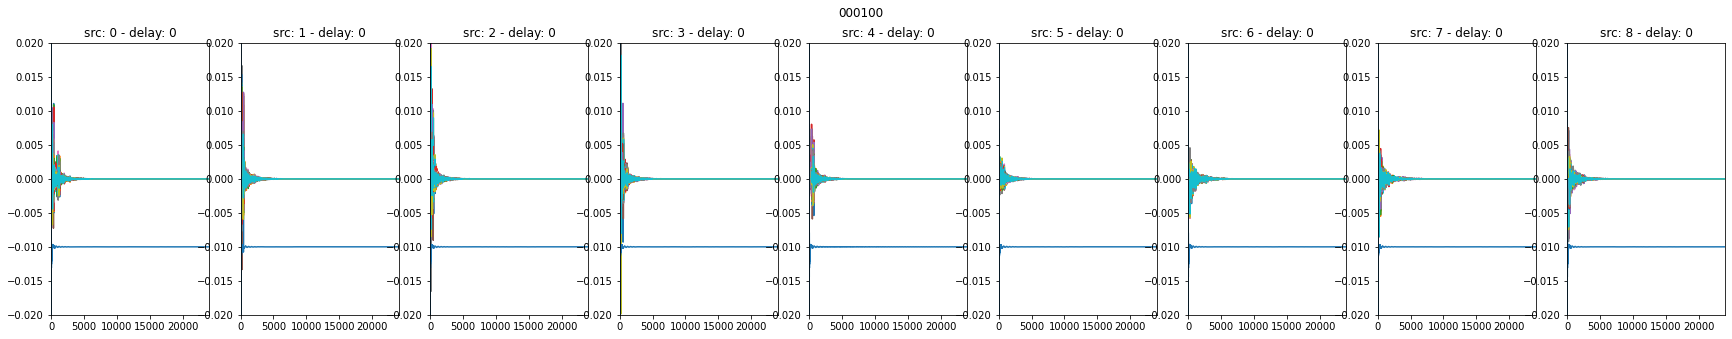

/rir/001000/0
/rir/001000/1
/rir/001000/2
/rir/001000/3
/rir/001000/4
/rir/001000/5
/rir/001000/6
/rir/001000/7
/rir/001000/8


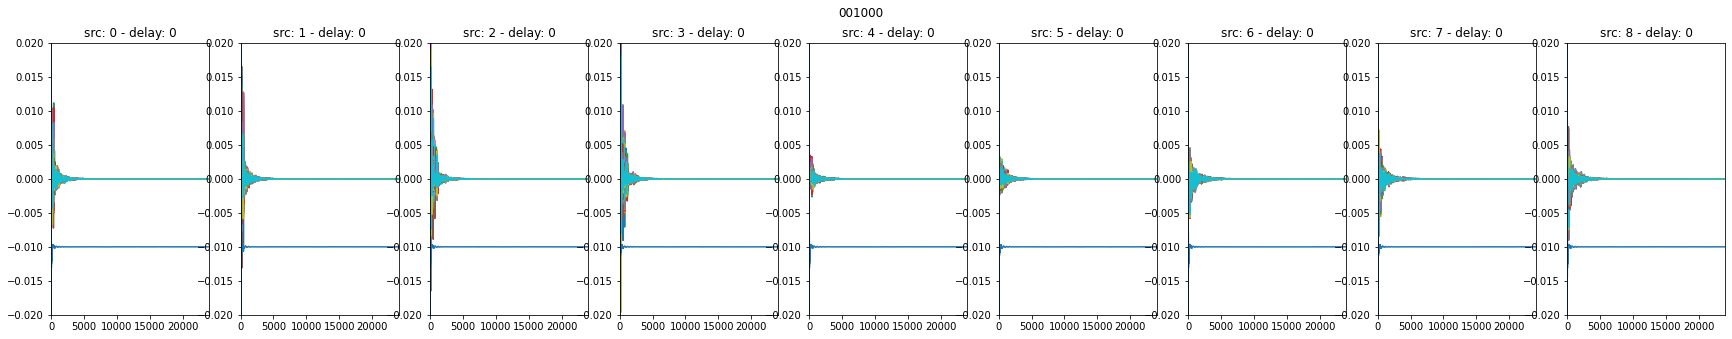

/rir/010000/0
/rir/010000/1
/rir/010000/2
/rir/010000/3
/rir/010000/4
/rir/010000/5
/rir/010000/6
/rir/010000/7
/rir/010000/8


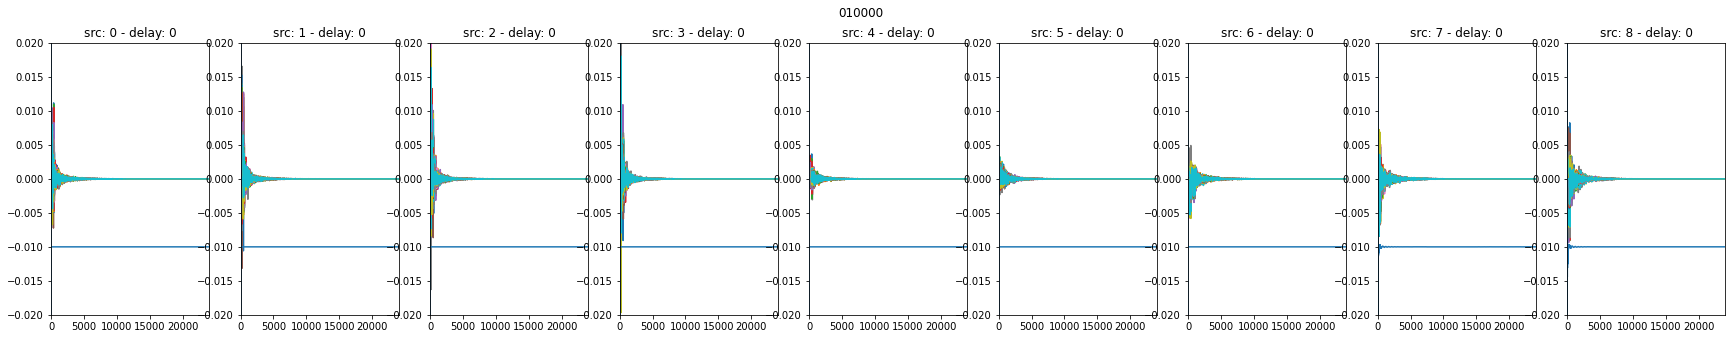

/rir/011000/0
/rir/011000/1
/rir/011000/2
/rir/011000/3
/rir/011000/4
/rir/011000/5
/rir/011000/6
/rir/011000/7
/rir/011000/8


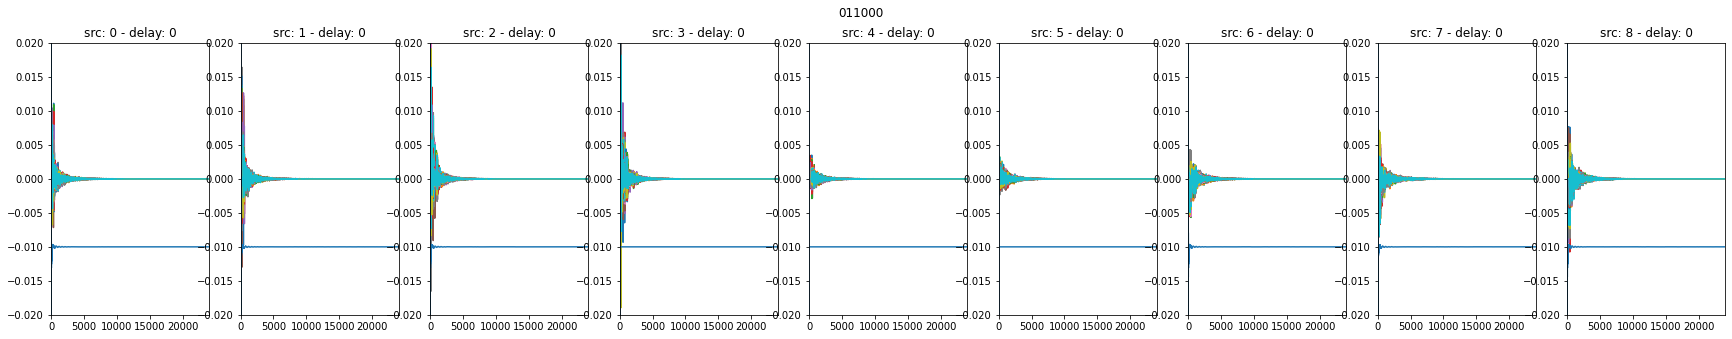

/rir/011100/0
/rir/011100/1
/rir/011100/2
/rir/011100/3
/rir/011100/4
/rir/011100/5
/rir/011100/6
/rir/011100/7
/rir/011100/8


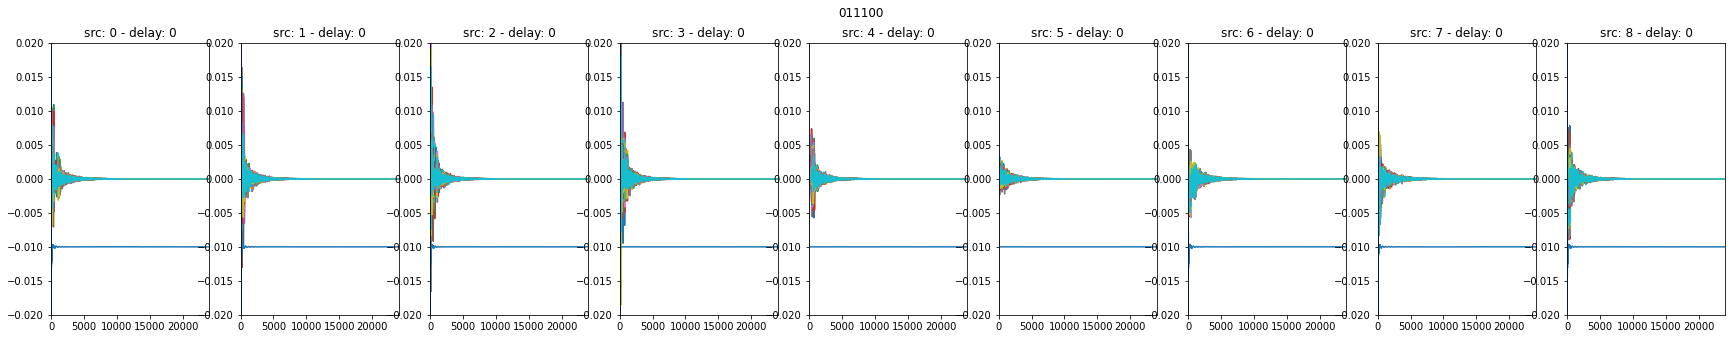

/rir/011110/0
/rir/011110/1
/rir/011110/2
/rir/011110/3
/rir/011110/4
/rir/011110/5
/rir/011110/6
/rir/011110/7
/rir/011110/8


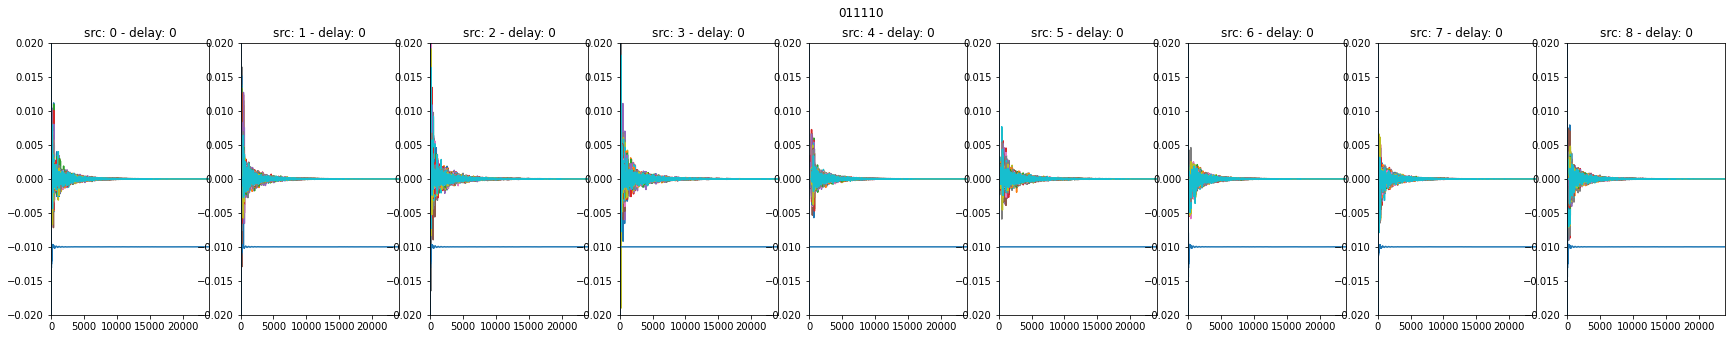

/rir/011111/0
/rir/011111/1
/rir/011111/2
/rir/011111/3
/rir/011111/4
/rir/011111/5
/rir/011111/6
/rir/011111/7
/rir/011111/8


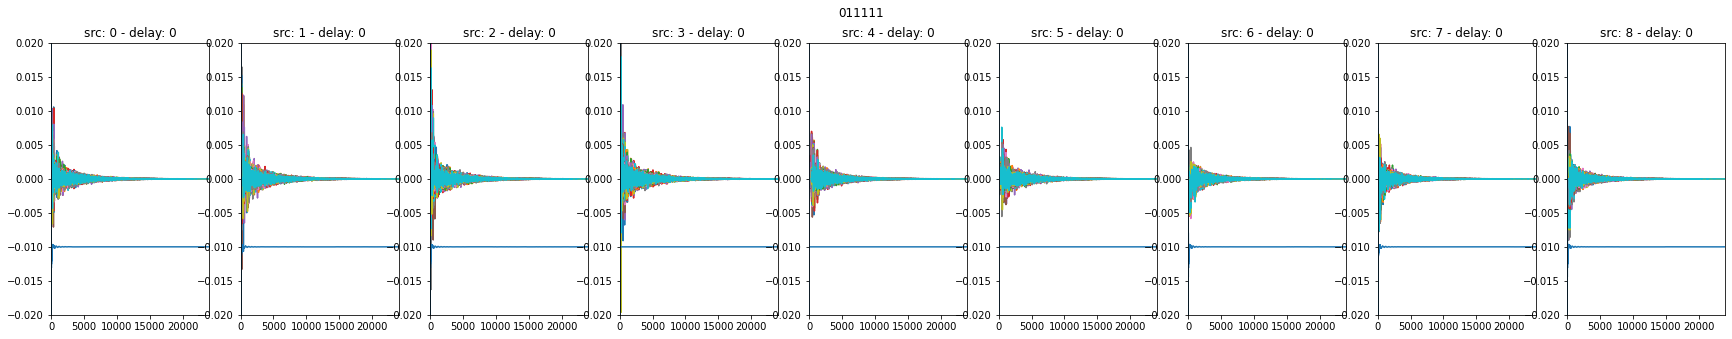

/rir/020002/0
/rir/020002/1
/rir/020002/2
/rir/020002/3
/rir/020002/4
/rir/020002/5
/rir/020002/6
/rir/020002/7
/rir/020002/8


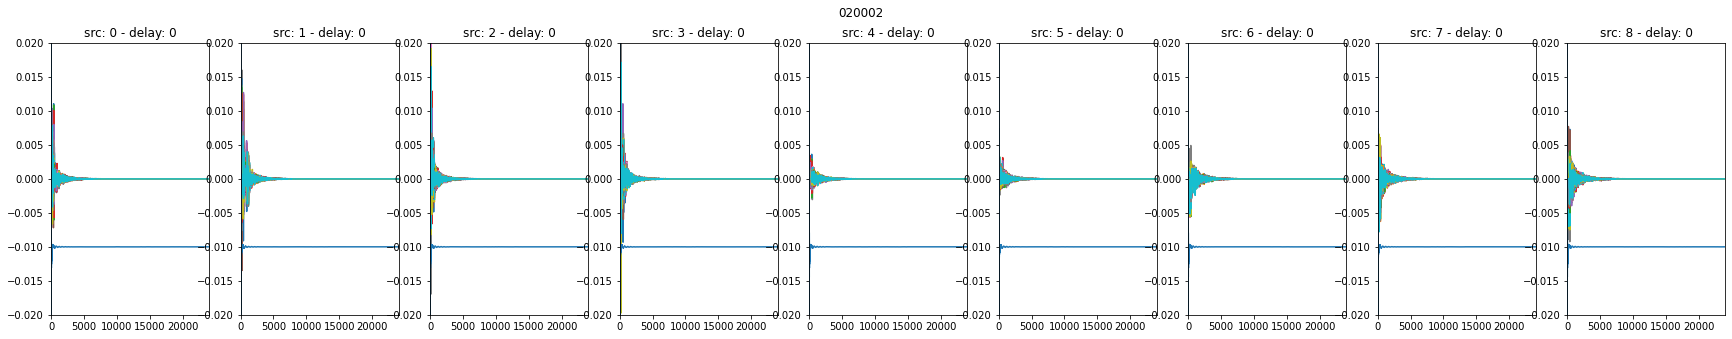

In [7]:
Fs = 48000
L = 0.5*Fs
for room in rooms:

    srcs = list(rir_dset['rir'][room])

    fig, axarr = plt.subplots(1, len(srcs), figsize=(30,5))
    plt.suptitle(room)

    for s, src in enumerate(srcs):

        group = f'/rir/{room}/{src}'
        print(group)
        rirs = np.asarray(rir_dset[group])
    
        d = 4444
        
#         if group in list(offset_insights.keys()):
#                 d = offset_insights[group]
        
        d = d - 4444

            
        axarr[s].set_title(f'src: {src} - delay: {d}')
        axarr[s].plot(rirs[:,:-1])
        axarr[s].plot(rirs[:,-1]-0.01)
        axarr[s].axvline(x=d)
        axarr[s].set_ylim([-0.02, 0.02])
        axarr[s].set_xlim([0, L])

    plt.show()